# baseline linear model results visualization 


In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
file_path = r"F:\neuron project with Jesus"
res = pd.read_csv(f"{file_path}/baseline_linear_model_p_qvalues2.csv") 

In [18]:
res

,Genes,n_obs,r2,p_cell_line,p_drug,p_day,coef_drug_DAPT_vs_VEH,se_drug_DAPT_vs_VEH,t_drug_DAPT_vs_VEH,pcoef_drug_DAPT_vs_VEH,...,ci97.5_day_8_vs_4,coef_day_16_vs_4,se_day_16_vs_4,t_day_16_vs_4,pcoef_day_16_vs_4,ci2.5_day_16_vs_4,ci97.5_day_16_vs_4,q_cell_line,q_drug,q_day
0,NUDT4B,95,0.131678,2.727828e-02,0.126352,1.061714e-01,-0.091369,0.059211,-1.543111,0.126352,...,0.348688,0.161609,0.083275,1.940662,0.055464,-0.003857,0.327075,4.424380e-02,0.420597,1.324229e-01
1,PIGBOS1,95,0.145017,3.396103e-01,0.588080,4.427435e-03,0.065144,0.119840,0.543594,0.588080,...,0.135908,0.052630,0.168545,0.312263,0.755571,-0.282266,0.387527,4.094599e-01,0.829779,7.237376e-03
2,TMEM275,95,0.604732,2.954456e-15,0.004475,1.315702e-06,0.313994,0.107649,2.916825,0.004475,...,-0.218476,-0.729513,0.151400,-4.818443,0.000006,-1.030341,-0.428684,2.759595e-14,0.056516,3.923346e-06
3,CENPVL1,95,0.622337,2.147679e-18,0.606685,8.725119e-05,-0.054085,0.104685,-0.516646,0.606685,...,0.596649,0.297331,0.147231,2.019485,0.046445,0.004786,0.589876,2.732048e-17,0.838838,1.943059e-04
4,NBDY,95,0.305526,1.302424e-03,0.295129,2.557654e-05,-0.117894,0.111945,-1.053137,0.295129,...,-0.218980,-0.077636,0.157443,-0.493106,0.623152,-0.390471,0.235199,2.720480e-03,0.624721,6.238737e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8747,MYO16,95,0.149731,1.571155e-01,0.025235,4.427061e-02,0.139129,0.061124,2.276171,0.025235,...,0.105995,-0.123240,0.085966,-1.433585,0.155195,-0.294053,0.047573,2.119086e-01,0.164328,5.970017e-02
8748,MORC2,95,0.518826,3.192115e-11,0.406145,8.006606e-07,0.027446,0.032883,0.834658,0.406145,...,0.201253,0.109404,0.046248,2.365617,0.020171,0.017511,0.201297,1.938750e-10,0.720719,2.489301e-06
8749,IVNS1ABP,95,0.471815,1.248813e-07,0.613518,3.701662e-08,-0.029279,0.057767,-0.506844,0.613518,...,0.448945,0.308131,0.081245,3.792595,0.000271,0.146698,0.469564,4.811277e-07,0.842247,1.424042e-07
8750,CAMTA1,95,0.145245,9.787987e-03,0.419735,7.044511e-02,0.067661,0.083466,0.810639,0.419735,...,0.358449,0.002666,0.117388,0.022713,0.981930,-0.230581,0.235914,1.736559e-02,0.731923,9.113608e-02


In [68]:

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# ===== Global style: Arial + publication-friendly =====
mpl.rcParams["font.family"] = "Arial"
# mpl.rcParams["pdf.fonttype"] = 42   # embed fonts in PDF
# mpl.rcParams["ps.fonttype"]  = 42

sns.set_theme(style="whitegrid", context="talk")  # talk=字体更大; paper=更紧凑


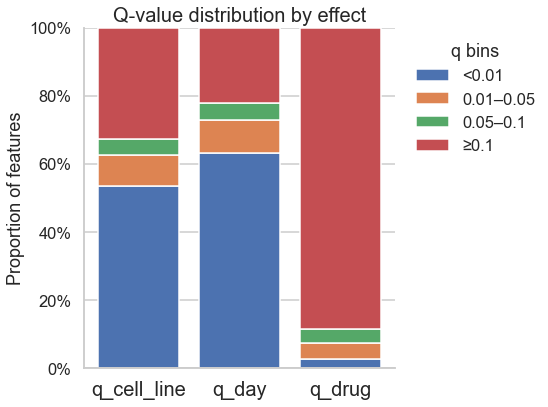

In [95]:
def plot_q_stacked_bar(res, cols=("q_drug", "q_day", "q_cell_line"),
                       bins=(0, 0.01, 0.05, 0.1, 1.0000001),
                       labels=("<0.01", "0.01–0.05", "0.05–0.1", "≥0.1"),
                       normalize=True,
                       show_legend=True):
    """
    Stacked bar plot for q-value distributions across multiple effects.
    """
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    df = res[list(cols)].copy()

    # long format
    long = df.melt(var_name="effect", value_name="q").dropna()
    long["q"] = pd.to_numeric(long["q"], errors="coerce").dropna().clip(1e-300, 1.0)

    # bin q-values
    long["q_bin"] = pd.cut(
        long["q"],
        bins=bins,
        labels=labels,
        include_lowest=True,
        right=False
    )

    # compute proportions or counts per effect x bin
    if normalize:
        tab = (
            long.groupby(["effect", "q_bin"], observed=True)
                .size()
                .groupby(level=0)
                .apply(lambda s: s / s.sum())
                .unstack(fill_value=0)
        )
        ylab = "Proportion of features"
        title = "Q-value distribution by effect"
    else:
        tab = (
            long.groupby(["effect", "q_bin"], observed=True)
                .size()
                .unstack(fill_value=0)
        )
        ylab = "Number of features"
        title = "Q-value distribution by effect (stacked counts)"

    # ensure consistent bin order
    tab = tab.reindex(columns=list(labels), fill_value=0)

    # ✅ 修复：把 effect index 里的 tuple 变回干净字符串（取第一个元素）
    clean_index = []
    for e in tab.index:
        if isinstance(e, tuple) and len(e) > 0:
            clean_index.append(str(e[0]))
        else:
            clean_index.append(str(e))
    tab.index = clean_index

    # plot stacked bars (matplotlib)
    fig, ax = plt.subplots(figsize=(8, 6))
    x = np.arange(len(tab.index))
    bottom = np.zeros(len(tab.index))

    for lab in labels:
        vals = tab[lab].values
        ax.bar(x, vals, bottom=bottom, label=lab)
        bottom += vals

    # cosmetics
    ax.set_xticks(x)
    ax.set_xticklabels(tab.index, rotation=0, fontsize = 20)
    ax.set_ylabel(ylab)
    ax.set_xlabel("")
    ax.set_title(title, fontsize = 20)

    # if proportions, keep y in [0,1] and show % ticks
    if normalize:
        ax.set_ylim(0, 1)
        yticks = ax.get_yticks()
        ax.set_yticks(yticks)
        ax.set_yticklabels([f"{int(round(t*100))}%" for t in yticks])

    # legend
    if show_legend:
        ax.legend(frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left", title="q bins")
    else:
        leg = ax.get_legend()
        if leg is not None:
            leg.remove()

    sns.despine()
    plt.tight_layout()
    plt.savefig(r"F:\neuron project with Jesus\figures\stacked_Q_values.svg", 
            dpi=600, bbox_inches="tight")
    plt.show()

# usage
plot_q_stacked_bar(res, show_legend=True)   # 或 False

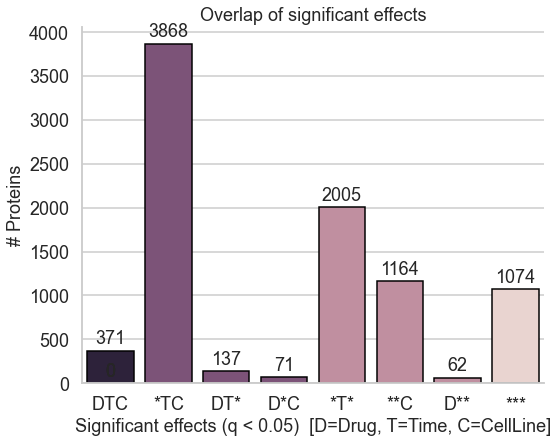

In [102]:
def plot_overlap_pretty(res, q_thr=0.05):
    sig = pd.DataFrame({
        "Drug": (res["q_drug"] < q_thr).fillna(False),
        "Time": (res["q_day"] < q_thr).fillna(False),
        "CellLine": (res["q_cell_line"] < q_thr).fillna(False),
    })

    ct = sig.value_counts().reset_index(name="count")

    # 组合标签更直观
    def label_row(r):
        parts = []
        parts.append("D" if r["Drug"] else "*")
        parts.append("T" if r["Time"] else "*")
        parts.append("C" if r["CellLine"] else "*")
        return "".join(parts)

    ct["combo"] = ct.apply(label_row, axis=1)
    ct["n_effects"] = ct[["Drug","Time","CellLine"]].sum(axis=1).astype(int)
    ct = ct.sort_values(["n_effects","count"], ascending=[False, False])

    plt.figure(figsize=(8, 6.5))
    ax = sns.barplot(
        data=ct, x="combo", y="count", hue="n_effects",
        dodge=False, edgecolor="black"
    )
    ax.set_xlabel(f"Significant effects (q < {q_thr})  [D=Drug, T=Time, C=CellLine]", fontsize = 18)
    ax.set_ylabel("# Proteins")
    ax.set_title("Overlap of significant effects")
    ax.legend().set_visible(False)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)

    # 给柱子加数值
    for p in ax.patches:
        h = p.get_height()
        ax.annotate(f"{int(h)}", (p.get_x() + p.get_width()/2, h),
                    ha="center", va="bottom", fontsize=18, rotation=0, xytext=(0, 3),
                    textcoords="offset points")

    sns.despine()
    plt.tight_layout()
    plt.savefig(r"F:\neuron project with Jesus\figures\overlap_proteins_effect.svg", 
            dpi=600, bbox_inches="tight")
    plt.show()

plot_overlap_pretty(res, q_thr=0.05)

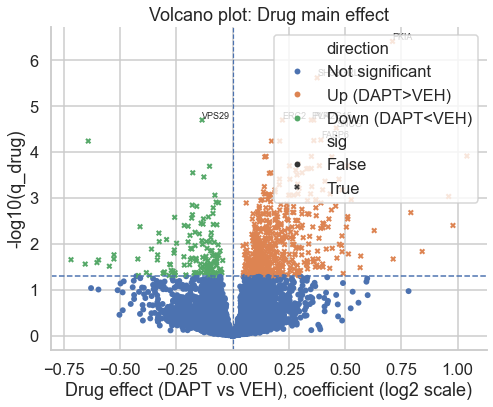

In [30]:
def plot_volcano_drug_pretty(res, q_thr=0.05, top_n=10, id_col=None):
    # 自动找一个ID列用于标注
    if id_col is None:
        id_col = "Genes" if "Genes" in res.columns else ("Protein" if "Protein" in res.columns else None)

    df = res.copy()
    df["coef"] = df["coef_drug_DAPT_vs_VEH"].astype(float)
    df["q"] = df["q_drug"].astype(float).clip(1e-300, 1.0)
    df["mlog10q"] = -np.log10(df["q"])

    df["sig"] = df["q"] < q_thr
    df["direction"] = np.where(df["coef"] > 0, "Up (DAPT>VEH)", "Down (DAPT<VEH)")
    df.loc[~df["sig"], "direction"] = "Not significant"

    plt.figure(figsize=(7.2, 6.0))
    ax = sns.scatterplot(
        data=df, x="coef", y="mlog10q",
        hue="direction",
        style="sig",
        s=35, edgecolor=None, linewidth=0,
    )

    # 阈值线
    ax.axhline(-np.log10(q_thr), linestyle="--", linewidth=1.5)
    ax.axvline(0, linestyle="--", linewidth=1.2)

    ax.set_xlabel("Drug effect (DAPT vs VEH), coefficient (log2 scale)")
    ax.set_ylabel("-log10(q_drug)")
    ax.set_title("Volcano plot: Drug main effect")
    ax.legend(title="", loc="upper right", frameon=True)

    # 标注 top hits（按 q 最小）
    if id_col is not None and id_col in df.columns:
        top = df.sort_values("q").head(top_n)
        for _, r in top.iterrows():
            ax.text(r["coef"], r["mlog10q"], str(r[id_col]),
                    fontsize=9, ha="left", va="bottom")

    sns.despine()
    plt.tight_layout()
    plt.show()

plot_volcano_drug_pretty(res, q_thr=0.05, top_n=8)

In [109]:
import re
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# =============================
# Global plotting style
# =============================
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 18



# -----------------------------
# 2) Helper functions
# -----------------------------
def _find_gene_row(res, gene, gene_col="Genes"):
    hit = res[res[gene_col].astype(str).str.upper() == gene.upper()]
    if hit.empty:
        hit = res[res[gene_col].astype(str).str.contains(gene, case=False, na=False)]
        if hit.empty:
            raise ValueError(f"{gene} not found.")
    return hit.iloc[0]


def _collect_contrasts(row, prefix):
    out = []
    for k in row.index:
        if not k.startswith("coef_" + prefix):
            continue
        suffix = k.replace("coef_", "")
        out.append({
            "contrast": suffix,
            "coef": row[k],
            "lo": row.get("ci2.5_" + suffix, np.nan),
            "hi": row.get("ci97.5_" + suffix, np.nan),
            "p": row.get("pcoef_" + suffix, np.nan)
        })
    return pd.DataFrame(out)


def _pretty_label(x):
    if x.startswith("day_"):
        a, b = x.replace("day_", "").split("_vs_")
        return f"Day {a} vs {b}"
    if x.startswith("drug_"):
        return x.replace("drug_", "").replace("_vs_", " vs ")
    if x.startswith("cell_"):
        return x.replace("cell_", "").replace("_vs_", " vs ")
    return x


def forest_plot(ax, df, title):
    df = df.copy()
    df["label"] = df["contrast"].map(_pretty_label)
    df = df.sort_values("coef", key=np.abs)

    y = np.arange(len(df))

    ax.axvline(0, color="black", lw=1)
    ax.errorbar(
        df["coef"],
        y,
        xerr=[df["coef"] - df["lo"], df["hi"] - df["coef"]],
        fmt="o",
        capsize=4,
        lw=2
    )

    ax.set_yticks(y)
    ax.set_yticklabels(df["label"], fontsize=18)
    ax.set_xlabel("Coefficient (effect size)", fontsize=18)
    ax.set_title(title, fontsize=18, pad=10)
    ax.grid(axis="x", alpha=0.3)

    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)


def plot_gene_effects(res, gene, save_path):
    row = _find_gene_row(res, gene)

    time_df = _collect_contrasts(row, "day_")
    drug_df = _collect_contrasts(row, "drug_")
    cell_df = _collect_contrasts(row, "cell_")

    fig, axes = plt.subplots(3, 1, figsize=(11, 9), constrained_layout=True)

    if not time_df.empty:
        forest_plot(
            axes[0],
            time_df,
            f"{gene} — Time effect (q = {row['q_day']:.3g})"
        )

    if not drug_df.empty:
        forest_plot(
            axes[1],
            drug_df,
            f"{gene} — Drug effect (q = {row['q_drug']:.3g})"
        )

    if not cell_df.empty:
        forest_plot(
            axes[2],
            cell_df,
            f"{gene} — Cell line effect (q = {row['q_cell_line']:.3g})"
        )

    # Save figure
    plt.savefig(
        save_path,
        dpi=600,
        bbox_inches="tight"
    )
    plt.close()




In [110]:
# -----------------------------
# 3) Run for PRPH & GPM6A
# -----------------------------
save_path = r"F:\neuron project with Jesus\figures\selected_proteins_effect_GPM6A.svg"

for gene in ["GPM6A"]:
    plot_gene_effects(res, gene, save_path)

In [111]:
# -----------------------------
# 3) Run for PRPH & GPM6A
# -----------------------------
save_path = r"F:\neuron project with Jesus\figures\selected_proteins_effect_PRPH.svg"

for gene in ["PRPH"]:
    plot_gene_effects(res, gene, save_path)